# Capstone Project on Lending Club Loan Data Set

_**By - Sujit Tripathy**_

## What is Lending Club
**Lending Club** is a US **peer-to-peer lending company**, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer **loan trading on a secondary market**. Lending Club operates an online lending platform that enables borrowers to obtain a loan, and investors to purchase notes backed by payments made on loans. Lending Club is the world's **largest peer-to-peer lending platform**. More information is available [here](https://en.wikipedia.org/wiki/Lending_Club).

The Data Set has been downloaded from [Lending Club](https://www.lendingclub.com/info/download-data.action) website. We will perform exploratory data analysis on **2017 Q2** data on both **approved** and **rejected** loans.
## Data
* Approved Loan Data Set:
    * **105,453** records
    * **143** columns
* Rejected Loan Data Set:
    * **447,235** records
    * **9** columns

## Keywords
 * **funded_amnt** : The total amount committed by Lending Club as loan amount.
 * **dti** - Debt to Income Ratio (A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested Lending Club loan, divided by the borrower’s self-reported monthly income).
 * **Risk_Score** - Borrower's Fico Score Range.
 * **int_rate**	: Interest Rate on the loan.
 * **verification_status**	: Indicates if income was verified by Lending Club, not verified, or if the income source was verified.

## Context
 * **Average loan amount** is **\$15,000** and **Maximum** loan amount is **\$40,000**.
 * Most borrowers applies **loan amount** in the **range** of **\$5,000** and **\$15,000**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns',150)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_loanstats_2017_q2 = pd.read_csv('https://s3.amazonaws.com/stkaggle/lending_club/LoanStats_securev1_2017Q2_Full.csv')
df_rejectedstats_2017_q2 = pd.read_csv('https://s3.amazonaws.com/stkaggle/lending_club/RejectStats_2017Q2.csv')

In [3]:
print('Total records in Approved loan Data Set : {} \n'.format(len(df_loanstats_2017_q2)))
#df_loanstats_2017_q2.info()
#print('\n')
#df_loanstats_2017_q2.head()
print('Total records in Rejected loan Data Set  : {} \n'.format(len(df_rejectedstats_2017_q2)))
#df_rejectedstats_2017_q2.info()
#df_rejectedstats_2017_q2.head()

Total records in Approved loan Data Set : 105453 

Total records in Rejected loan Data Set  : 447235 



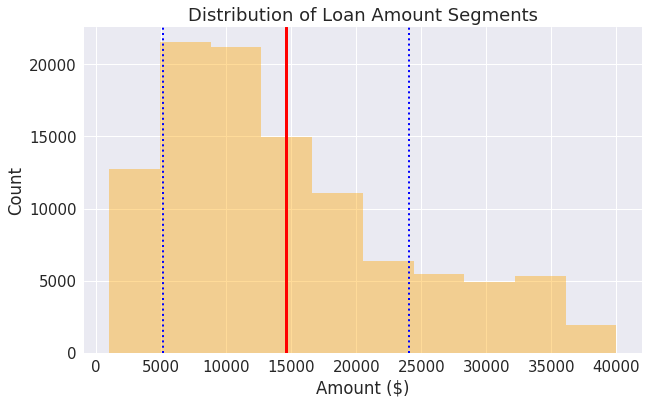

In [4]:
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
plt.figure(figsize=(10,6))
ax1 = sns.distplot(df_loanstats_2017_q2['funded_amnt'].dropna(), color='orange', 
                  kde=False,bins=10)
funded_amt_min = df_loanstats_2017_q2['funded_amnt'].min()
funded_amt_mean = df_loanstats_2017_q2['funded_amnt'].mean()
funded_amt_std = df_loanstats_2017_q2['funded_amnt'].std()
funded_amt_max = df_loanstats_2017_q2['funded_amnt'].max()
ax1.axvline(funded_amt_mean,lw=3,color='r')
ax1.axvline(funded_amt_mean + funded_amt_std, color='b',lw=2,linestyle='dotted')
ax1.axvline(funded_amt_mean - funded_amt_std, color='b',lw=2, linestyle='dotted')
ax1.set_xlabel('Amount ($)')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Loan Amount Segments')
plt.show()

In [5]:
print('Minimum Loan Amount: ${}'.format(int(funded_amt_min)))
print('Average Loan Amount: ${}, Standard Deviation: ${}'.format(int(funded_amt_mean),int(funded_amt_std)))
print('Maximum Loan Amount: ${}'.format(int(funded_amt_max)))

Minimum Loan Amount: $1000
Average Loan Amount: $14589, Standard Deviation: $9478
Maximum Loan Amount: $40000


# Exploratory Data Analysis

## Question 1: What are the different purposes Lending Club provides loans to its customers? Which loan type yields high-interest rate?

* **Total 7 loan grades** Lending Club offers. **Grade 'A'** incurs **lower interest rate** and grade **'G' highest interest rate**.
* **More than 50%** of the loans are **Debt Consolidation** category. The **second highest** category is **Credit Card at 20%**.
* Lending Club offers **11 types** of loans excluding 'other' type. 
* Below is the **interest rates** across loan types :
  * **Minimum** interest rate : **< 10%**
  * **Median** interest rate  : **> 10%** and **<15%**
  * **Maximum** interest rate : **> 30%**
* **Highest interest rate** loan category is **Home buying**.

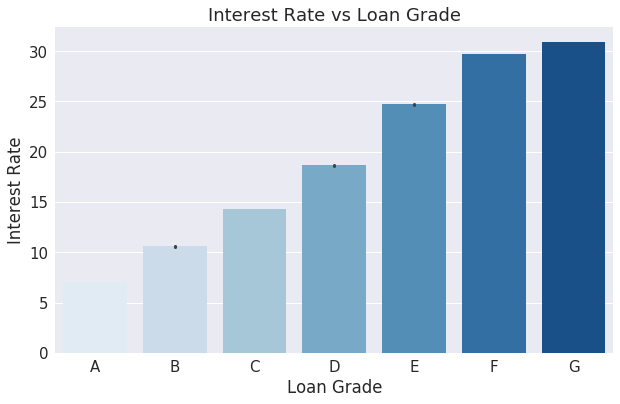

In [6]:
columns = ['loan_amnt','int_rate','title','grade']
df_loan_interest_rate = df_loanstats_2017_q2[columns]
df_loan_interest_rate['int_rate'] = df_loan_interest_rate['int_rate'].apply(lambda irate:str(irate).split('%')[0]).astype('float64')
#df_loan_interest_rate.head()
sns.set()
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
grade_types = df_loan_interest_rate['grade'].value_counts().sort_index().index
ax = sns.barplot(data=df_loan_interest_rate,x='grade',y='int_rate',palette='Blues',order=grade_types)
ax.set_xlabel('Loan Grade')
ax.set_ylabel('Interest Rate')
ax.set_title('Interest Rate vs Loan Grade')
plt.show()

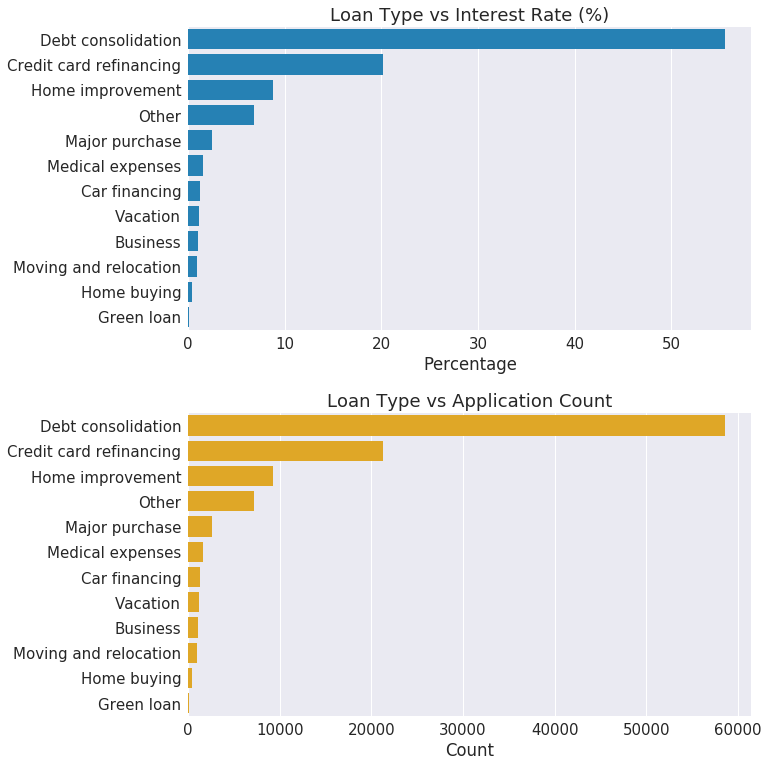

In [7]:
sns.set()
loan_purpose_data = {'Count':df_loan_interest_rate['title'].value_counts().values,
        'Percentage':df_loan_interest_rate['title'].value_counts(normalize=True)}
df_purpose = pd.DataFrame(loan_purpose_data)
df_purpose['Percentage'] = df_purpose['Percentage'].apply(lambda val:(val*100))

sns.set(font_scale=1.5)
_,axis = plt.subplots(2,1,figsize=(11,11))
ax1 = sns.barplot(data=df_purpose,y=df_purpose.index,x='Percentage',color='#0e87cc',ax=axis[0])
ax1.set_title('Loan Type vs Interest Rate (%)')

ax2 = sns.barplot(data=df_purpose,y=df_purpose.index,x='Count',color='#feb308',ax=axis[1])
ax2.set_title('Loan Type vs Application Count')
plt.tight_layout()
plt.show()

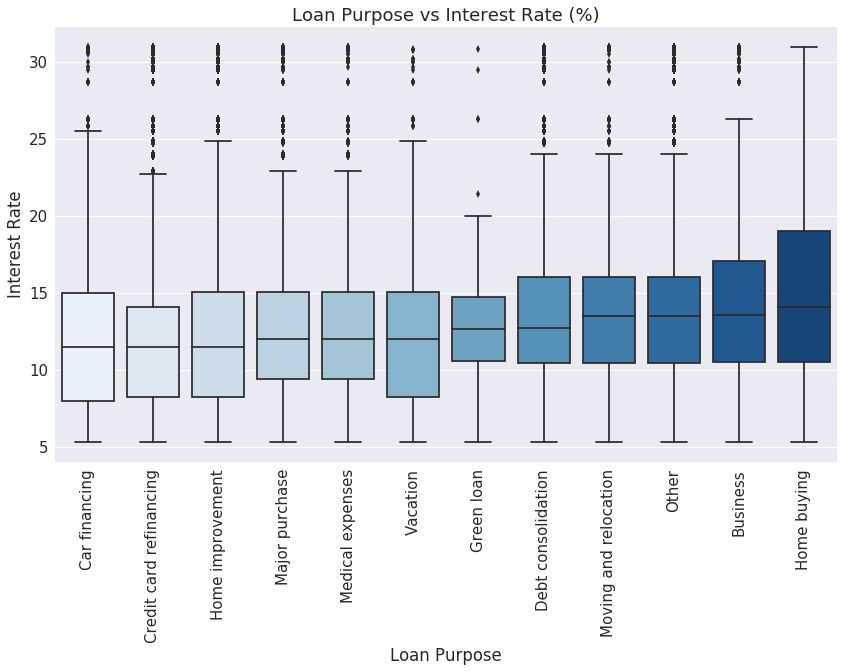

In [8]:
sns.set(font_scale=1.5)
plt.figure(figsize=(14,8))
order = df_loan_interest_rate.groupby('title')['int_rate'].median().sort_values().index
ax = sns.boxplot(data=df_loan_interest_rate,x='title',y='int_rate',palette='Blues',order=order)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('Loan Purpose')
ax.set_ylabel('Interest Rate')
ax.set_title('Loan Purpose vs Interest Rate (%)')
plt.show()

## Question 2: What is the reason behind loan application rejection?

* **Average 'dti' (Debt-To-Income)** ratio of **Approved** vs **Rejected** loans is differing between **3% to 4%**. However, most of the loans are getting **rejected** because of **higher 'dti' ratio**.
* **More than 50 point** difference on **mean risk score** between **approved** and **rejected** loan. 
* **More than 90%** of the applications getting **rejected** based on **employment length** which is **< 1 year**. 
* All **three** factors such as **Debt to Income (dti ratio)**, **Employment Length**, and **Credit Score** plays a critical role **successful loan approval**.

In [9]:
df_rejectedstats_2017_q2_valid = df_rejectedstats_2017_q2.dropna()
#Rename columns with the same as Approved data set
df_rejectedstats_2017_q2_valid.rename_axis({'Loan Title':'title',
                                            'Debt-To-Income Ratio':'dti',
                                            'Employment Length':'emp_length',
                                            'Amount Requested':'funded_amnt'}
                                           ,axis=1,inplace=True)
# There are title with underscore and without underscore so, lets replace the duplicate ones 
df_rejectedstats_2017_q2_valid.replace({'debt_consolidation':'Debt consolidation',
                                       'home_improvement':'Home improvement',
                                       'major_purchase':'Major purchase',
                                       'vacation':'Vacation',
                                       'renewable_energy':'Green loan',
                                       'moving':'Moving and relocation',
                                       'small_business':'Business',
                                       'credit_card':'Credit card refinancing',
                                       'house':'Home improvement',
                                       'medical':'Medical expenses',
                                       'car':'car financing','car financing':'Car financing',
                                       'other':'Other'},inplace=True)
df_rejectedstats_2017_q2_valid['dti'] = df_rejectedstats_2017_q2_valid['dti'].apply(lambda val:str(val).split('%')[0]).astype('float64')
df_rejectedstats_2017_q2_valid.drop(['Application Date','Policy Code','State','Zip Code'],axis=1,inplace=True)
#df_rejectedstats_2017_q2_valid.head()
columns = ['funded_amnt','title','dti','emp_length','fico_range_low','fico_range_high']
df_approvedstats_2017_q2_valid = df_loanstats_2017_q2[columns].dropna()
df_approvedstats_2017_q2_valid['Risk_Score'] = (df_approvedstats_2017_q2_valid['fico_range_low']+ df_approvedstats_2017_q2_valid['fico_range_high'])/2
#df_approvedstats_2017_q2_valid.head()
print('Initial records in Approved Loan Data Set - {}'.format(len(df_approvedstats_2017_q2_valid)))
print('Initial records in Reject Loan Data Set - {} '.format(len(df_rejectedstats_2017_q2_valid)))


Initial records in Approved Loan Data Set - 105376
Initial records in Reject Loan Data Set - 176561 


In [10]:
# Taking 50,000 random samples from both the Approved and Rejected Loan DataFrame for analysis.
df_rejectedstats_2017_q2_sample = df_rejectedstats_2017_q2_valid.sample(50000)
df_approvedstats_2017_q2_sample = df_approvedstats_2017_q2_valid.sample(50000)
print('After sampling, number of records in Approved Loan Data Set - {}'.format(len(df_approvedstats_2017_q2_sample)))
print('After sampling, number of records in Reject Loan Data Set - {} '.format(len(df_rejectedstats_2017_q2_sample)))

After sampling, number of records in Approved Loan Data Set - 50000
After sampling, number of records in Reject Loan Data Set - 50000 


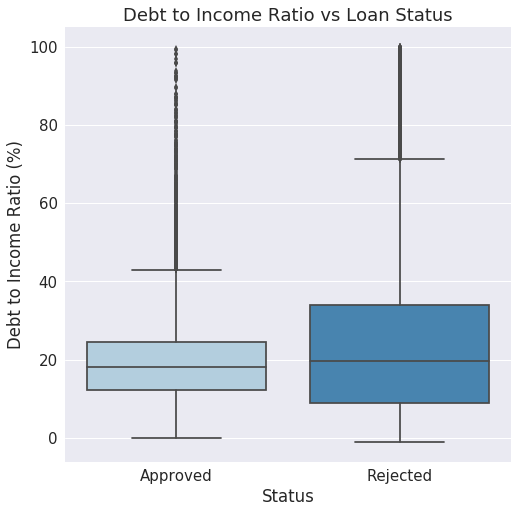

In [11]:
df_approvedstats_2017_q2_sample['Status'] = 'Approved'
df_rejectedstats_2017_q2_sample['Status'] = 'Rejected'
df_aprved_sample_filter = df_approvedstats_2017_q2_sample[['dti','Risk_Score','Status']] 
df_app_rej_compare = df_aprved_sample_filter.append(df_rejectedstats_2017_q2_sample[['dti','Risk_Score','Status']])
df_app_rej_compare['Risk_Score'] = df_app_rej_compare['Risk_Score'].astype(int)
approved_status_sample_dti_mean = df_app_rej_compare[df_app_rej_compare['Status']=='Approved']['dti'].mean()
rejected_status_sample_dti_mean = df_app_rej_compare[df_app_rej_compare['Status']=='Rejected']['dti'].mean()
#print('Approved loan dti mean : {:4.2f}'.format(approved_status_sample_dti_mean))
#print('Rejected loan dti mean : {:4.2f}'.format(rejected_status_sample_dti_mean))
# Filtering the records based on'DebtToIncome' ratio upto 99.99%
df_approvedstats_2017_q2_sample = df_approvedstats_2017_q2_sample[df_approvedstats_2017_q2_sample['dti'] < 99.99]
df_rejectedstats_2017_q2_sample = df_rejectedstats_2017_q2_sample[df_rejectedstats_2017_q2_sample['dti'] < 99.99]
df_app_rej_compare = df_app_rej_compare[df_app_rej_compare['dti'] < 99.99]
sns.set()
sns.set(font_scale=1.5)
plt.figure(figsize=(8,8))
ax = sns.boxplot(data=df_app_rej_compare,x='Status',y='dti',palette='Blues')
ax.set_ylabel('Debt to Income Ratio (%)')
ax.set_title('Debt to Income Ratio vs Loan Status')
plt.show()

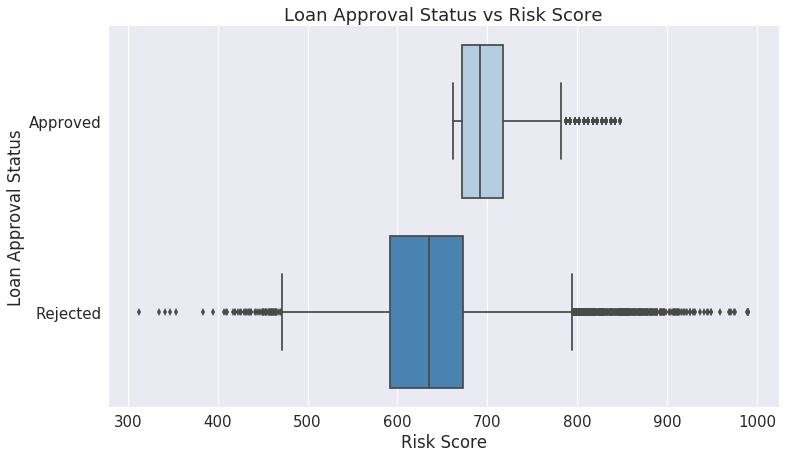

In [12]:
df_app_rej_compare.dtypes
approved_status_risk_score_mean = df_app_rej_compare[df_app_rej_compare['Status']=='Approved']['Risk_Score'].mean()
rejected_status_risk_score_mean = df_app_rej_compare[df_app_rej_compare['Status']=='Rejected']['Risk_Score'].mean()
#print('Approved loan Risk Score mean : {}'.format(int(approved_status_risk_score_mean)))
#print('Rejected loan Risk Score mean : {}'.format(int(rejected_status_risk_score_mean)))
sns.set()
sns.set(font_scale=1.5)
plt.figure(figsize=(12,7))
ax = sns.boxplot(data=df_app_rej_compare,y='Status',x='Risk_Score',palette='Blues')
ax.set_xlabel('Risk Score')
ax.set_ylabel('Loan Approval Status')
ax.set_title('Loan Approval Status vs Risk Score')
plt.show()

In [13]:
df_rejectedstats_2017_q2_sample['emp_length'].value_counts(normalize=True)

< 1 year     0.895132
5 years      0.030214
10+ years    0.022015
n/a          0.021370
1 year       0.005940
3 years      0.005810
2 years      0.005767
4 years      0.004175
6 years      0.003120
7 years      0.002432
8 years      0.002087
9 years      0.001937
Name: emp_length, dtype: float64

Text(0.5,1,'Loan Rejection vs Length of Employment of Applicant')

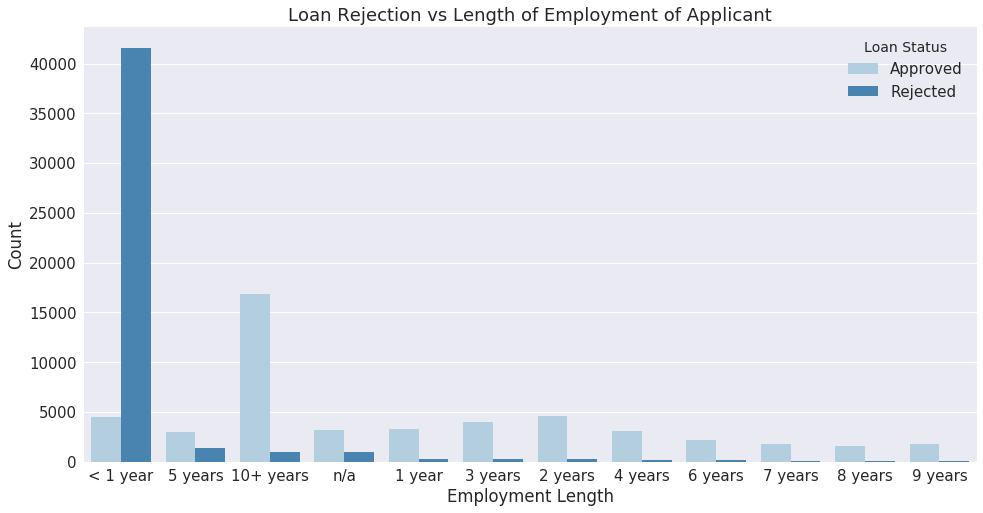

In [14]:
sns.set()
sns.set(font_scale=1.5)
df_approvedstats_2017_q2_sample['Loan Status'] = 'Approved'
df_rejectedstats_2017_q2_sample['Loan Status'] = 'Rejected'
# Create a new DF by concating both approved and reject data set
df_combined_app_rej = pd.concat([df_approvedstats_2017_q2_sample,df_rejectedstats_2017_q2_sample])
order = df_rejectedstats_2017_q2_sample['emp_length'].value_counts().index
plt.figure(figsize=(16,8))
ax = sns.countplot(data=df_combined_app_rej, x='emp_length',hue='Loan Status',order=order,palette='Blues')
ax.set_xlabel('Employment Length')
ax.set_ylabel('Count')
ax.set_title('Loan Rejection vs Length of Employment of Applicant')

## Question 3: How is Lending Club's overall performance in 2017 Q2 ?


* To figure out overall **financial health/performance** of Lending Club in **2017 Q2**, we are going to focus on the below perspectives: 
    * **What's the total loan amount vs collected amount?**
     * Total issues loan is **\$1.5 billion** and **\$15 million** collected.
    * **What's the Default and Charged Off amount out of total loaned amount?**
     * Charged off loan amount is **\$11 million** out of **\$1.5 billion**
    * **What's the Fully Paid amount out of total loaned amount?**
     * Fully paid loan is **\$70** million out of **\$1.5 billion**
* Loan **Grade C** is the most popular loan grade followed by loan **Grade B and A**.
* **84%** of the **2017 Q2** loan amount is yet to be collected.
* **0.07%** of borrowers is **defaulted/charged-off** on the loan repayment.
* **\$178** million has been collected towards **loan principal amount**.

In [15]:
def int_r_splitter(int_r_str):
    return np.float64(int_r_str.split('%')[0])

In [16]:
columns = ['issue_d','loan_status','grade','funded_amnt','total_pymnt','int_rate',
           'out_prncp','total_rec_prncp','total_rec_int']
df_fin_info_q2 = df_loanstats_2017_q2[columns]
df_fin_info_q2['int_rate'] = df_fin_info_q2['int_rate'].apply(lambda x:int_r_splitter(str(x)))
df_fin_info_q2['Fully Paid Amount'] = df_fin_info_q2[df_fin_info_q2['loan_status']=='Fully Paid']['total_pymnt']
df_fin_info_q2['Fully Paid Amount'].fillna(value=0,inplace=True)
#print('Total recods: ',df_fin_info_q2.size)
#df_fin_info_q2.head()

In [17]:
fully_paid_amnt = df_fin_info_q2[df_fin_info_q2['loan_status']=='Fully Paid']['Fully Paid Amount'].sum()
print('Fully paid loan amount is, ${}'.format(int(fully_paid_amnt)))

Fully paid loan amount is, $70261726


In [18]:
charge_off_loan_amt = df_fin_info_q2[df_fin_info_q2['loan_status'].isin(['Default','Charged Off'])]['funded_amnt'].sum()
print('Charge off and Default loan status amount is, ${}'.format(int(charge_off_loan_amt)))

Charge off and Default loan status amount is, $1111775


**Note** : The below tabular information shows the details calculated loan amounts quarterly such as total funded amount, fully paid amount etc.

In [19]:
df_q2_summary = df_fin_info_q2.groupby('issue_d')[['funded_amnt','out_prncp',
                                                   'total_rec_prncp','total_rec_int','Fully Paid Amount']].agg('sum')
#Renaming the columns for better readability
df_q2_summary.rename_axis({'funded_amnt':'Total Funded Amount',
                          'out_prncp':'Remaining outstanding principal',
                          'total_rec_prncp':'Principal received to date',
                          'total_rec_int':'Interest received to date'},axis=1,inplace=True)
df_q2_summary.head()

,Total Funded Amount,Remaining outstanding principal,Principal received to date,Interest received to date,Fully Paid Amount
issue_d,,,,,
Apr-2017,437930725.0,3.715637e+08,6.551996e+07,22119222.54,2.642672e+07
Jun-2017,550982575.0,5.025486e+08,4.834575e+07,16476681.87,1.842519e+07
May-2017,549518775.0,4.842687e+08,6.510519e+07,22495743.46,2.540981e+07


In [20]:
total_funded_amount_q2 = 0
remaining_outsnd_bal_q2 = 0
prin_rcvd_to_dt_q2 = 0
int_rcvd_to_dt_q2 = 0
fully_paid_amt_q2 = 0
for i in df_q2_summary.index:
    total_funded_amount_q2 += df_q2_summary.loc[i]['Total Funded Amount']
    remaining_outsnd_bal_q2 += df_q2_summary.loc[i]['Remaining outstanding principal']
    prin_rcvd_to_dt_q2 += df_q2_summary.loc[i]['Principal received to date']
    int_rcvd_to_dt_q2 += df_q2_summary.loc[i]['Interest received to date']
    fully_paid_amt_q2 += df_q2_summary.loc[i]['Fully Paid Amount']
    
print('Total Funded Amount in 2017 Q2 , ${:.0f}'.format(total_funded_amount_q2))
print('Remaining outstanding principal in 2017 Q2 , ${:.0f}'.format(remaining_outsnd_bal_q2))
print('Principal received to date in 2017 Q2 , ${:.0f}'.format(prin_rcvd_to_dt_q2))
print('Interest received to date in 2017 Q2 , ${:.0f}'.format(int_rcvd_to_dt_q2))
print('Amount collected towards Fully Paid Amount in 2017 Q2 , ${:.0f}'.format(fully_paid_amt_q2))
print('\n')

'''
    The remaining amount % which needs to be collected is :
        ((Remaining Outstanding Principal - Amount Fully Paid) / Total Funded Loan Amount) * 100
'''
remin_amt_perc = ((remaining_outsnd_bal_q2-fully_paid_amt_q2)/total_funded_amount_q2) * 100
print('{:.0f}% Total funded amount of 2017 Q2 is yet to be collected.'.format(remin_amt_perc))

Total Funded Amount in 2017 Q2 , $1538432075
Remaining outstanding principal in 2017 Q2 , $1358380950
Principal received to date in 2017 Q2 , $178970901
Interest received to date in 2017 Q2 , $61091648
Amount collected towards Fully Paid Amount in 2017 Q2 , $70261727


84% Total funded amount of 2017 Q2 is yet to be collected.


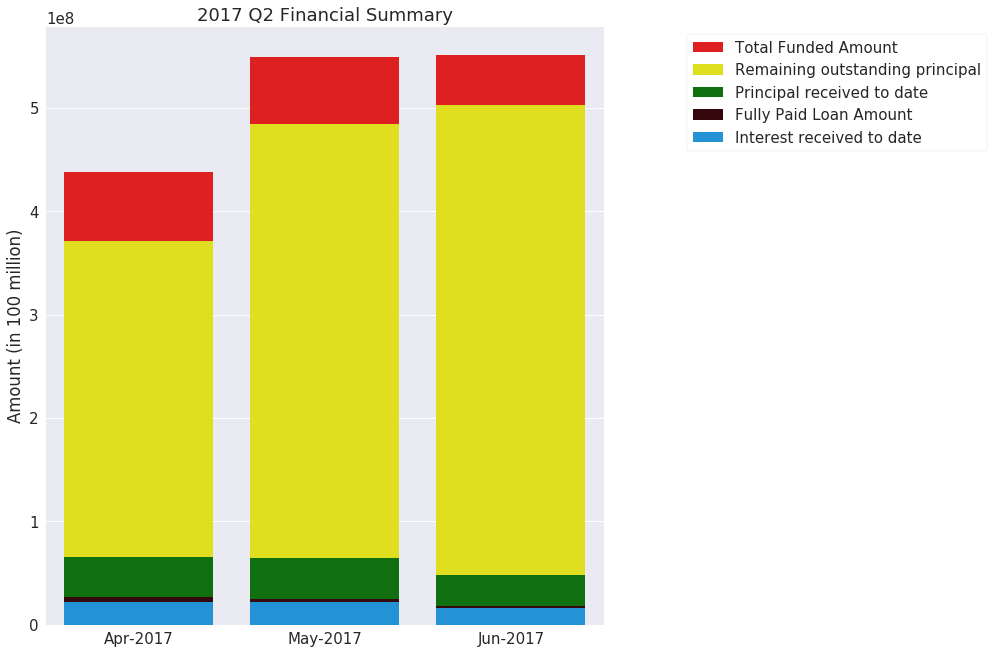

In [21]:
_, ax = plt.subplots(figsize=(10,11))
sns.set(font_scale=1.5)
sns.set_style('ticks')
sns.barplot(data=df_q2_summary,x=df_q2_summary.index,y='Total Funded Amount',
                    label='Total Funded Amount',color='red',order=['Apr-2017','May-2017','Jun-2017'])
sns.barplot(data=df_q2_summary,x=df_q2_summary.index,
                y='Remaining outstanding principal',label='Remaining outstanding principal',color='yellow'
           ,order=['Apr-2017','May-2017','Jun-2017'])
sns.barplot(data=df_q2_summary,x=df_q2_summary.index,
                y='Principal received to date',label='Principal received to date',color='green'
           ,order=['Apr-2017','May-2017','Jun-2017'])
sns.barplot(data=df_q2_summary,x=df_q2_summary.index,
                y='Fully Paid Amount', label = 'Fully Paid Loan Amount', color='#3c0008'
           ,order=['Apr-2017','May-2017','Jun-2017'])
sns.barplot(data=df_q2_summary,x=df_q2_summary.index,
                y='Interest received to date',label='Interest received to date',color='#069af3'
           ,order=['Apr-2017','May-2017','Jun-2017'])

ax.legend(loc='upper right',frameon=True,bbox_to_anchor=(1.7,1))
ax.set_title('2017 Q2 Financial Summary')
sns.despine()
ax.set(xlabel='',ylabel='Amount (in 100 million)')
plt.show()

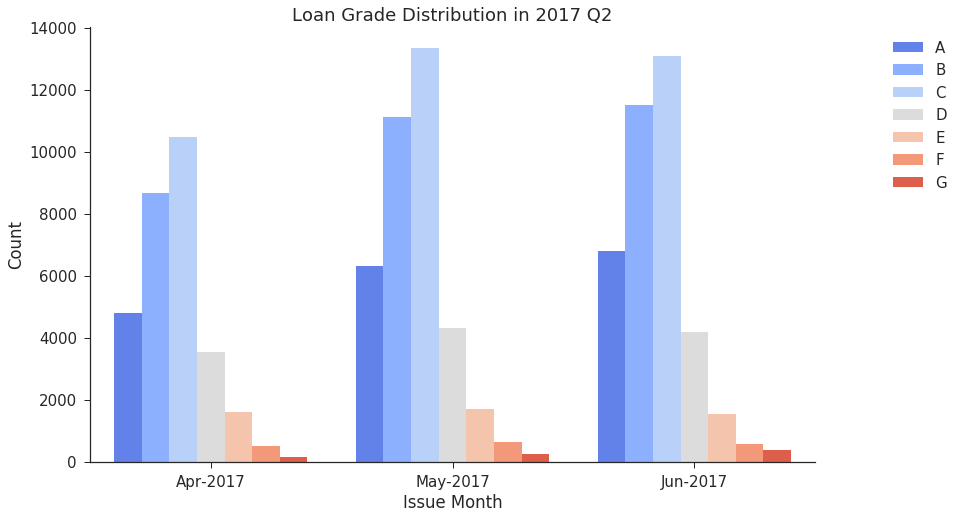

In [22]:
_,ax = plt.subplots(figsize=(13,8))
sns.countplot(data=df_fin_info_q2,x='issue_d',hue='grade',palette='coolwarm',saturation=1
                  ,order=['Apr-2017','May-2017','Jun-2017'],hue_order=df_fin_info_q2['grade'].value_counts().sort_index().index)
sns.despine()
ax.set(xlabel='Issue Month',ylabel='Count')
ax.set_title('Loan Grade Distribution in 2017 Q2')
ax.legend(loc='upper right',bbox_to_anchor=(1.2,1))
plt.show()

In [23]:
total_lon_cnt = len(df_fin_info_q2)
def_chgoff_ln_count = len(df_fin_info_q2[df_fin_info_q2['loan_status'].isin(['Default','Charged Off'])])
                                     
print('Total issued loans : {}'.format(total_lon_cnt))
print('Total Charged Off & Default loan count : {}'.format(def_chgoff_ln_count))
default_ln_perc = (def_chgoff_ln_count/total_lon_cnt)*100

print('Loan Charged Off or Default % of Total issued loans : {:4.2f}'.format(default_ln_perc))

Total issued loans : 105453
Total Charged Off & Default loan count : 74
Loan Charged Off or Default % of Total issued loans : 0.07


## Question 4: Does Lending Club's loan verification process has any impact on the loan charged off or default?

* There is **no direct relation** between loan verification status by Lending Club with borrower's Annual Income and DTI ratio. Accounts which are in current and hasn't been verified, where as accounts in Charged Off/Default status has been verified.
* The 'Source Verified' means, Lending Club has verified the borrower's income details based on loan application amount.

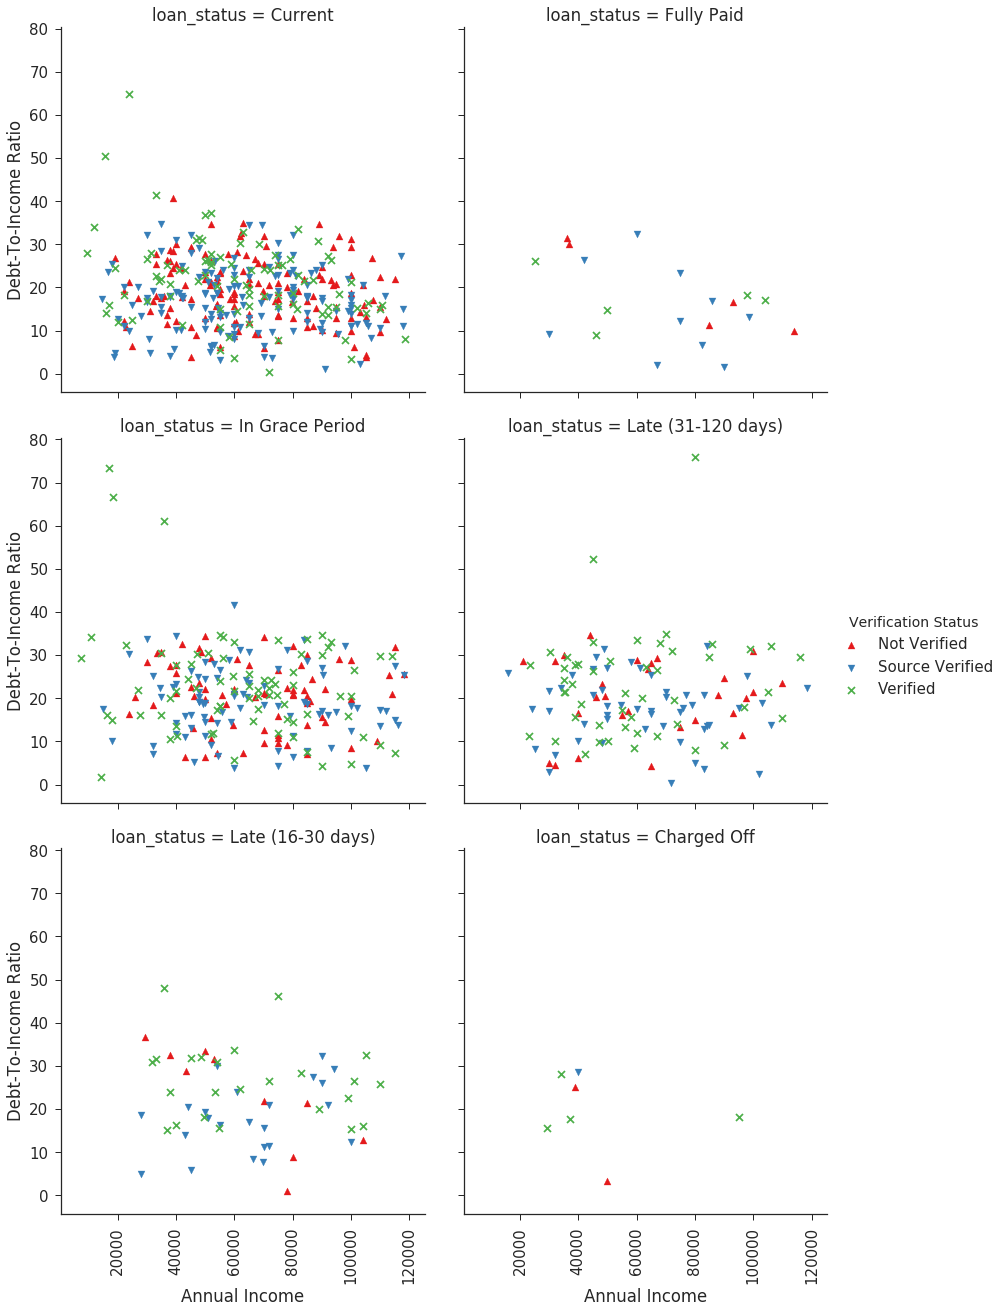

In [24]:
# Create two Data Sets for Current & Fully Paid vs Default/Late/Charged Off
columns = ['funded_amnt','annual_inc','dti','loan_status','verification_status']
good_sts_arr = ['Current', 'Fully Paid']
df_good_status = df_loanstats_2017_q2[df_loanstats_2017_q2['loan_status'].isin(good_sts_arr) & (df_loanstats_2017_q2['dti'] < 100)][columns]
late_and_default_sts_arr = ['In Grace Period','Late (16-30 days)' ,'Late (31-120 days)','Charged Off','Default']
df_not_good_status = df_loanstats_2017_q2[df_loanstats_2017_q2['loan_status'].isin(late_and_default_sts_arr) & (df_loanstats_2017_q2['dti'] < 100)][columns]
#Create a combined DataFrame with samples from both original Data Sets.
df_good_status = df_good_status.sample(500)
df_not_good_status = df_not_good_status.sample(500)
#Combining both the Data Sets
df_sts_combined_sample = df_good_status.append(df_not_good_status)
# For our test we are capping annual income upto 120k.
df_sts_combined_sample = df_sts_combined_sample[df_sts_combined_sample['annual_inc'] < 120000]
g = sns.FacetGrid(data=df_sts_combined_sample,col='loan_status',
                  size=6,col_wrap=2,hue='verification_status',hue_kws={'marker':['^','v','x']},palette='Set1')
g.map(plt.scatter,'annual_inc','dti')
g.add_legend(title='Verification Status')
g.set_xlabels('Annual Income')
g.set_ylabels('Debt-To-Income Ratio')
g.set_xticklabels(rotation=90)
plt.show()

# Future Research

As part of future the research, I would like to predict by applying Machine Learning classification techniques whether a borrower can be default or not on the loan repayment. What we found that a small population (0.07%) of total borrowers are getting default, however, this number can be reduced further which will help Lending Club and its investor to save from future losses.